In [15]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json
import pandas as pd
from scipy import stats
import os

#with open('transfer_experiment.json', 'r') as fp:
#    data = json.load(fp)
    
def load_data(experiments):
    data = { 'results' : {} }
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        if os.path.isfile('experiments/' + experiment_title + '/' + experiment_title + '.json'):
            with open('experiments/' + experiment_title + '/' + experiment_title + '.json', 'r') as fp:
                results = json.load(fp)
                data['results'][experiment_title] = results
    return data

In [27]:
experiments = [
            {'id': '1', 'source':'imdb', 'target':'uwcse', 'predicate':'workedunder', 'to_predicate':'advisedby'},
            {'id': '2', 'source':'uwcse', 'target':'imdb', 'predicate':'advisedby', 'to_predicate':'workedunder'},
            {'id': '3', 'source':'imdb', 'target':'uwcse', 'predicate':'movie', 'to_predicate':'publication'},
            {'id': '4', 'source':'uwcse', 'target':'imdb', 'predicate':'publication', 'to_predicate':'movie'},
            {'id': '5', 'source':'imdb', 'target':'uwcse', 'predicate':'genre', 'to_predicate':'inphase'},
            {'id': '6', 'source':'uwcse', 'target':'imdb', 'predicate':'inphase', 'to_predicate':'genre'},
            {'id': '7', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samevenue'},
            {'id': '8', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samebib'},
            {'id': '9', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'sameauthor'},
            {'id': '10', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'sametitle'},
            {'id': '11', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samevenue'},
            {'id': '12', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samebib'},
            {'id': '13', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'sameauthor'},
            {'id': '14', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'sametitle'},
            {'id': '15', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype'},
            {'id': '16', 'source':'yeast', 'target':'twitter', 'predicate':'interaction', 'to_predicate':'follows'},
            {'id': '17', 'source':'yeast', 'target':'twitter', 'predicate':'location', 'to_predicate':'tweets'},
            {'id': '18', 'source':'yeast', 'target':'twitter', 'predicate':'enzyme', 'to_predicate':'tweets'},
            {'id': '19', 'source':'yeast', 'target':'twitter', 'predicate':'function', 'to_predicate':'tweets'},
            {'id': '20', 'source':'yeast', 'target':'twitter', 'predicate':'phenotype', 'to_predicate':'tweets'},
            {'id': '21', 'source':'yeast', 'target':'twitter', 'predicate':'complex', 'to_predicate':'tweets'},
            {'id': '22', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass'},
            {'id': '23', 'source':'twitter', 'target':'yeast', 'predicate':'follows', 'to_predicate':'interaction'},
            {'id': '24', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'location'},
            {'id': '25', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'enzyme'},
            {'id': '26', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'function'},
            {'id': '27', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'phenotype'},
            {'id': '28', 'source':'twitter', 'target':'yeast', 'predicate':'tweets', 'to_predicate':'complex'},
            {'id': '29', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamalsoknownas', 'to_predicate':'companyalsoknownas'},
            {'id': '30', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplaysagainstteam', 'to_predicate':'companyalsoknownas'},
            {'id': '31', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplaysagainstteam', 'to_predicate':'acquired'},
            {'id': '32', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplaysagainstteam', 'to_predicate':'bankboughtbank'},
            {'id': '33', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplayssport', 'to_predicate':'companyceo'},
            {'id': '34', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplayssport', 'to_predicate':'bankchiefexecutiveceo'},
            {'id': '35', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplaysforteam', 'to_predicate':'bankchiefexecutiveceo'},
            {'id': '36', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'athleteplaysforteam', 'to_predicate':'companyceo'},
            {'id': '37', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplayssport', 'to_predicate':'companyeconomicsector'},
            {'id': '38', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyalsoknownas', 'to_predicate':'teamalsoknownas'},
            {'id': '39', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyalsoknownas', 'to_predicate':'teamplaysagainstteam'},
            {'id': '40', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'acquired', 'to_predicate':'teamplaysagainstteam'},
            {'id': '41', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'bankboughtbank', 'to_predicate':'teamplaysagainstteam'},
            {'id': '42', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyceo', 'to_predicate':'athleteplayssport'},
            {'id': '43', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'bankchiefexecutiveceo', 'to_predicate':'athleteplayssport'},
            {'id': '44', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'bankchiefexecutiveceo', 'to_predicate':'athleteplaysforteam'},
            {'id': '45', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyceo', 'to_predicate':'athleteplaysforteam'},
            {'id': '46', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyeconomicsector', 'to_predicate':'teamplayssport'},
            {'id': '47', 'source':'yeast', 'target':'facebook', 'predicate':'interaction', 'to_predicate':'edge'},
            {'id': '48', 'source':'twitter', 'target':'facebook', 'predicate':'follows', 'to_predicate':'edge'},
            {'id': '49', 'source':'imdb', 'target':'facebook', 'predicate':'workedunder', 'to_predicate':'edge'},
            {'id': '50', 'source':'uwcse', 'target':'facebook', 'predicate':'advisedby', 'to_predicate':'edge'},
]

data = load_data(experiments)

for metric in ['AUC ROC', 'AUC PR', 'CLL']: #, 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data['results']:
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                #for metric in ['AUC ROC', 'AUC PR']:
                    #display(Markdown('## ' + metric))
                mapping_time = ''
                if metric == 'Precision':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                elif metric == 'Learning and Revision time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping = np.array([(np.array([item['transfer']['Mapping results']['Total time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping_time = ' (%.1f)' % mapping.mean()
                elif metric == 'Inference time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                else:
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                table.append([dataset +'_' + str(amount), '%.3f +/- %.3f' % (parameter.mean(), 2 * parameter.std()),
                '%.3f +/- %.3f' % (transfer.mean(), 2 * transfer.std()),
                '%.3f +/- %.3f' % (scratch.mean(), 2 * scratch.std()),
                '%.3f +/- %.3f' % (scratch_rdn.mean(), 2 * scratch_rdn.std())])
                 #             ])
    display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory', 'Learning from scratch (RDN-B)', 'Learning from scratch (RDN)']))
    #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for AUC ROC

,Experiment,Transfer Learning,Transfer Learning with Revision Theory,Learning from scratch (RDN-B),Learning from scratch (RDN)
0,1_imdb_uwcse_0.2,0.944 +/- 0.000,0.950 +/- 0.004,0.940 +/- 0.009,0.918 +/- 0.022
1,1_imdb_uwcse_0.4,0.944 +/- 0.000,0.951 +/- 0.006,0.950 +/- 0.004,0.932 +/- 0.020
2,1_imdb_uwcse_0.6,0.944 +/- 0.000,0.954 +/- 0.003,0.953 +/- 0.004,0.945 +/- 0.024
3,1_imdb_uwcse_0.8,0.944 +/- 0.000,0.955 +/- 0.004,0.956 +/- 0.007,0.945 +/- 0.010
4,1_imdb_uwcse_1.0,0.944 +/- 0.000,0.959 +/- 0.005,0.958 +/- 0.005,0.947 +/- 0.021
5,2_uwcse_imdb_0.2,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,0.983 +/- 0.022
6,2_uwcse_imdb_0.4,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000
7,2_uwcse_imdb_0.6,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,0.998 +/- 0.003
8,2_uwcse_imdb_0.8,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,0.999 +/- 0.003
9,2_uwcse_imdb_1.0,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000


# Results for AUC PR

,Experiment,Transfer Learning,Transfer Learning with Revision Theory,Learning from scratch (RDN-B),Learning from scratch (RDN)
0,1_imdb_uwcse_0.2,0.459 +/- 0.000,0.421 +/- 0.047,0.367 +/- 0.093,0.320 +/- 0.063
1,1_imdb_uwcse_0.4,0.459 +/- 0.000,0.450 +/- 0.048,0.425 +/- 0.045,0.351 +/- 0.055
2,1_imdb_uwcse_0.6,0.459 +/- 0.000,0.463 +/- 0.016,0.468 +/- 0.029,0.451 +/- 0.043
3,1_imdb_uwcse_0.8,0.459 +/- 0.000,0.464 +/- 0.042,0.489 +/- 0.070,0.417 +/- 0.092
4,1_imdb_uwcse_1.0,0.459 +/- 0.000,0.501 +/- 0.047,0.490 +/- 0.037,0.463 +/- 0.027
5,2_uwcse_imdb_0.2,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,0.866 +/- 0.085
6,2_uwcse_imdb_0.4,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000
7,2_uwcse_imdb_0.6,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,0.950 +/- 0.070
8,2_uwcse_imdb_0.8,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,0.975 +/- 0.070
9,2_uwcse_imdb_1.0,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000,1.000 +/- 0.000


# Results for CLL

,Experiment,Transfer Learning,Transfer Learning with Revision Theory,Learning from scratch (RDN-B),Learning from scratch (RDN)
0,1_imdb_uwcse_0.2,-0.227 +/- 0.017,-0.218 +/- 0.036,-0.224 +/- 0.030,-0.214 +/- 0.003
1,1_imdb_uwcse_0.4,-0.220 +/- 0.010,-0.212 +/- 0.011,-0.211 +/- 0.012,-0.214 +/- 0.004
2,1_imdb_uwcse_0.6,-0.219 +/- 0.003,-0.209 +/- 0.006,-0.212 +/- 0.016,-0.211 +/- 0.002
3,1_imdb_uwcse_0.8,-0.220 +/- 0.008,-0.215 +/- 0.009,-0.214 +/- 0.022,-0.211 +/- 0.002
4,1_imdb_uwcse_1.0,-0.220 +/- 0.007,-0.209 +/- 0.003,-0.212 +/- 0.002,-0.211 +/- 0.003
5,2_uwcse_imdb_0.2,-0.067 +/- 0.003,-0.066 +/- 0.001,-0.072 +/- 0.004,-0.168 +/- 0.007
6,2_uwcse_imdb_0.4,-0.067 +/- 0.002,-0.065 +/- 0.001,-0.066 +/- 0.003,-0.163 +/- 0.000
7,2_uwcse_imdb_0.6,-0.067 +/- 0.002,-0.066 +/- 0.001,-0.065 +/- 0.002,-0.163 +/- 0.001
8,2_uwcse_imdb_0.8,-0.067 +/- 0.002,-0.065 +/- 0.000,-0.065 +/- 0.002,-0.163 +/- 0.001
9,2_uwcse_imdb_1.0,-0.067 +/- 0.002,-0.065 +/- 0.001,-0.064 +/- 0.000,-0.163 +/- 0.000


# Results for AUC ROC

# 1_imdb_uwcse

trRDN-B Rev [0.95040445, 0.95084325, 0.95394265, 0.9553802499999999, 0.95917405]
trRDN-B [0.9443426, 0.9443426, 0.9443426, 0.9443426, 0.9443426]
RDN-B [0.9395219500000002, 0.9496731499999999, 0.9529754500000001, 0.95565195, 0.95829365]
RDN [0.9176458, 0.93207655, 0.9451099000000001, 0.94512575, 0.9470201999999999]


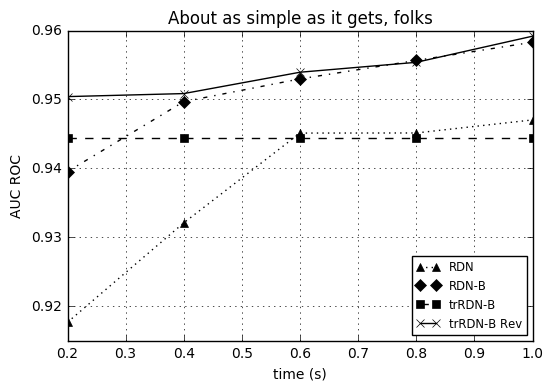

# 2_uwcse_imdb

trRDN-B Rev [1.0, 1.0, 1.0, 1.0, 1.0]
trRDN-B [1.0, 1.0, 1.0, 1.0, 1.0]
RDN-B [1.0, 1.0, 1.0, 1.0, 1.0]
RDN [0.9832157333333335, 1.0, 0.9980054666666667, 0.9990027333333332, 1.0]


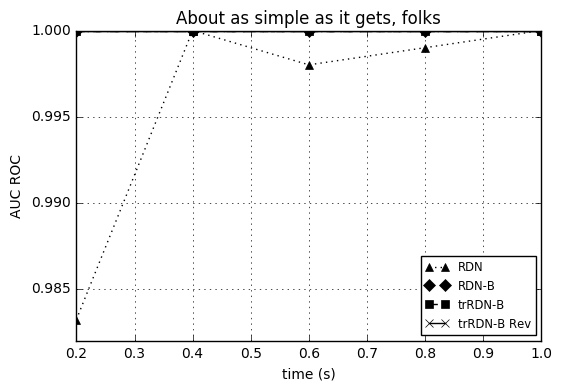

# Results for AUC PR

# 1_imdb_uwcse

trRDN-B Rev [0.4208026, 0.4497349, 0.46331285, 0.464372, 0.50056095]
trRDN-B [0.4593376, 0.4593376, 0.4593376, 0.4593376, 0.4593376]
RDN-B [0.36655055000000003, 0.42468, 0.46772145000000004, 0.4885398, 0.4902847]
RDN [0.31981434999999997, 0.35118074999999993, 0.45111375, 0.4165454, 0.4631978]


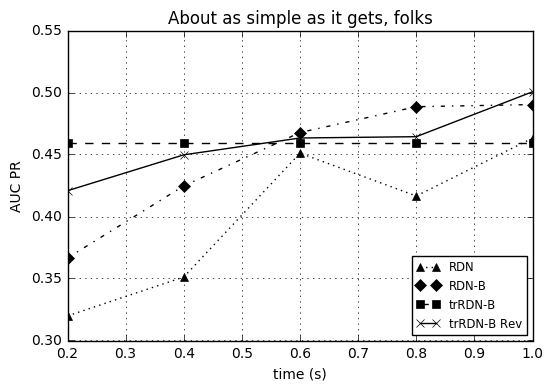

# 2_uwcse_imdb

trRDN-B Rev [1.0, 1.0, 1.0, 1.0, 1.0]
trRDN-B [1.0, 1.0, 1.0, 1.0, 1.0]
RDN-B [1.0, 1.0, 1.0, 1.0, 1.0]
RDN [0.8660016666666666, 1.0, 0.9502348, 0.9751173999999999, 1.0]


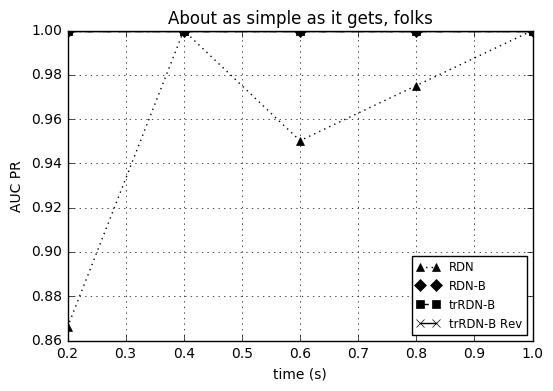

# Results for CLL

# 1_imdb_uwcse

trRDN-B Rev [-0.21825165000000002, -0.2121487, -0.20891790000000002, -0.21487255000000002, -0.2088936]
trRDN-B [-0.22664069999999997, -0.22044814999999998, -0.21913115, -0.2196632, -0.2197029]
RDN-B [-0.2243123, -0.2105414, -0.21193564999999998, -0.21394005000000002, -0.21165050000000002]
RDN [-0.21402500000000002, -0.21391404999999997, -0.2114047, -0.21115625000000002, -0.21062240000000002]


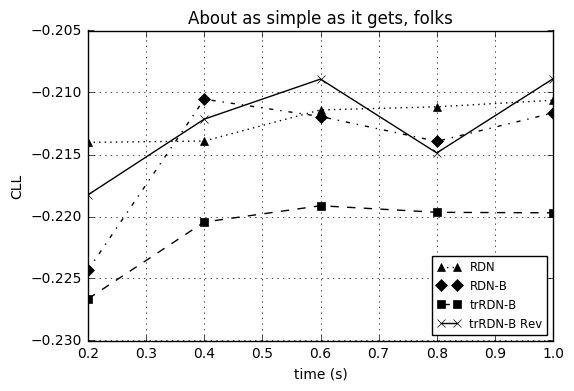

# 2_uwcse_imdb

trRDN-B Rev [-0.0657136, -0.06535039999999999, -0.06559366666666666, -0.0650216, -0.06538519999999999]
trRDN-B [-0.067332, -0.06684706666666668, -0.06685246666666667, -0.06690746666666667, -0.06687086666666667]
RDN-B [-0.07243573333333332, -0.06637406666666666, -0.0650648, -0.0650636, -0.06414693333333332]
RDN [-0.16824486666666663, -0.162615, -0.16335646666666667, -0.16298573333333333, -0.162615]


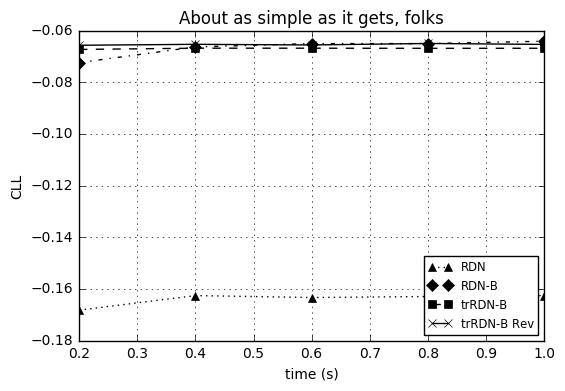

In [26]:
for metric in ['AUC ROC', 'AUC PR', 'CLL']:
    display(Markdown('# Results for ' + metric))
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data['results']:
            display(Markdown('# ' + dataset))
            transfer_p = []
            parameter_p = []
            rdn_p = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                #for metric in ['AUC ROC', 'AUC PR']:
                    #display(Markdown('## ' + metric))
                mapping_time = ''
                if metric == 'Precision':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Precision'][0] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                elif metric == 'Learning and Revision time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Learning time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping = np.array([(np.array([item['transfer']['Mapping results']['Total time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    #mapping_time = ' (%.1f)' % mapping.mean()
                elif metric == 'Inference time':
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)]['Inference time'] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                else:
                    scratch = np.array([(np.array([item['rdn_b_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    scratch_rdn = np.array([(np.array([item['rdn_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    parameter = np.array([(np.array([item['transfer_'+str(amount)]['parameter_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                    transfer = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data['results'][str(dataset)]])
                table.append([dataset, '%.3f +/- %.3f' % (parameter.mean(), 2 * parameter.std()),
                '%.3f +/- %.3f' % (transfer.mean(), 2 * transfer.std()),
                '%.3f +/- %.3f' % (scratch.mean(), 2 * scratch.std()),
                '%.3f +/- %.3f' % (scratch_rdn.mean(), 2 * scratch_rdn.std())])
                 #             ])
                transfer_p.append(transfer.mean())
                parameter_p.append(parameter.mean())
                rdn_b_p.append(scratch.mean())
                rdn_p.append(scratch_rdn.mean())

            print('trRDN-B Rev %s' % transfer_p)
            print('trRDN-B %s' % parameter_p)
            print('RDN-B %s' % rdn_b_p)
            print('RDN %s' % rdn_p)
            t = [0.2, 0.4, 0.6, 0.8, 1.0]
            fig, ax = plt.subplots()
            ax.plot(t, rdn_p, '^-', linestyle=':', color='k', label='RDN')
            ax.plot(t, rdn_b_p, 'D-', linestyle='-.', color='k', label='RDN-B')
            ax.plot(t, parameter_p, 's-', linestyle='--', color='k', label='trRDN-B')
            ax.plot(t, transfer_p, 'x-', linestyle='-', color='k', label='trRDN-B Rev')

            ax.set(xlabel='time (s)', ylabel=metric,
                   title='About as simple as it gets, folks')
            ax.grid(linestyle = ':')
            ax.legend(loc='lower right', fontsize='small', frameon=True)
            plt.show()